# Fundamentals of risk adjusted returns with real data

This document shows a few examples of how to use and calculate some basic measures of risk and reward. First, we will download the data from the Fama and French library for the returns of small and big caps stocks and afterwards we will compare the risk and returns for both portfolios.


By: Ismael Jiménez

License: MIT

Import the necessary quantopy subpackages.

In [1]:
import quantopy as qp

## Retrieve portfolio data

In this document we will use the data for the returns of equal-weighted portfolios divided on size, retrieved from the Fama and French library. 

First we need to download the data of all portfolios divided on size, and we will list all options available for portfolio selection.

In [2]:
ds = qp.get('Portfolios_Formed_on_ME', 'famafrench')
print(ds['DESCR'])

Portfolios Formed on ME
-----------------------

This file was created by CMPT_ME_RETS using the 202104 CRSP database. It contains value- and equal-weighted returns for size portfolios. Each record contains returns for: Negative (not used) 30% 40% 30%   5 Quintiles  10 Deciles The portfolios are constructed at the end of Jun. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Value Weight Returns -- Monthly (1138 rows x 19 cols)
  1 : Equal Weight Returns -- Monthly (1138 rows x 19 cols)
  2 : Value Weight Returns -- Annual from January to December (94 rows x 19 cols)
  3 : Equal Weight Returns -- Annual from January to December (94 rows x 19 cols)
  4 : Number of Firms in Portfolios (1138 rows x 19 cols)
  5 : Average Firm Size (1138 rows x 19 cols)


Now we can select the data for the equal-weighted portfolios.

In [3]:
portfolio = ds[1]
portfolio.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1926-07,NaN,-0.0043,0.0152,0.0268,-0.0057,0.0059,0.0160,0.0147,0.0333,-0.0142,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
1926-08,NaN,0.0374,0.0304,0.0209,0.0360,0.0359,0.0371,0.0161,0.0233,0.0461,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
1926-09,NaN,-0.0107,-0.0054,0.0016,-0.0048,-0.0140,0.0000,-0.0050,-0.0009,0.0091,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
1926-10,NaN,-0.0329,-0.0352,-0.0306,-0.0325,-0.0410,-0.0289,-0.0336,-0.0295,-0.0472,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
1926-11,NaN,-0.0046,0.0382,0.0309,-0.0054,0.0218,0.0341,0.0339,0.0316,-0.0077,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


As we want to work with small and big caps, we will retrieve the data from the companies in the top and bottom decile.

In [4]:
columns = ['Lo 10', 'Hi 10']
returns = portfolio[columns]
returns.columns = ['SmallCap', 'BigCap']
returns.head()

,SmallCap,BigCap
Date,,
1926-07,-0.0142,0.0329
1926-08,0.0461,0.0370
1926-09,0.0091,0.0067
1926-10,-0.0472,-0.0243
1926-11,-0.0077,0.0270


We can now plot the returns, to get an overall feeling of the behaviour of the two return series.  

<AxesSubplot:title={'center':'Stock Returns'}, xlabel='Date'>

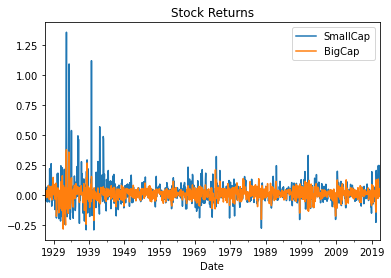

In [5]:
returns.plot(title='Stock Returns')

We can easily see from the graph that historically Small Caps have been more volatile than big cap. In the next steps we will see by how much and what does that mean in terms of risk adjusted performance.

## Analysis of basice shape characteristics of probability distribution

Very often we would like to know certain shape characteristics of a probability distribution. We might want to know where the distribution is centered, and how spread out the distribution is about the central value. Inthis section we will calculate the two most basic shape characteristics of a probability distribution:

1. expected value (mean): measures the center of mass of a distribution

2. variance and standard deviation: measures the spread about the mean

### Expected Return

In [6]:
returns.gmean()

SmallCap    0.013518
BigCap      0.007698
dtype: float64

#### Expected Return: annualized

In [7]:
returns.effect(qp.stats.period.MONTHLY)

SmallCap    0.174837
BigCap      0.096387
dtype: float64

We can see that Small Caps stocks had a mean yearly return for the period of of almost double of the Big Caps return.

### Standard Deviation of returns

In [8]:
returns.std()

SmallCap    0.106336
BigCap      0.054002
dtype: float64

#### Standard Returns: Annualized

In [9]:
returns.effect_vol(qp.stats.period.MONTHLY)

SmallCap    0.368359
BigCap      0.187070
dtype: float64

As we had already anticipated, we can see that the annualized standard deviation of returns for Small Caps (36.8%) is almost double the standard deviation of returns for Big Caps (18.7%).

## Reward-to-volatility Basic Ratio

Now that we have the return and the risk, we can measure a the sharpe of ratio to get a quick look whether the extra volatility of Small Caps is worth the extra returns. [[1]] 

Sharpe’s ratio can be thought of as a “reward- to-risk” ratio. It is the ratio of the reward quantified by the excess expected return to the risk as measured by the standard deviation. If $E(R_{P})$ and $\sigma_{Rp}$ are the expected return and standard deviation of the return on a portfolio and $\mu_{f}$ is the risk-free rate, then
$$ \frac{E(R_{P}) - \mu_{f}}{\sigma_{Rp}}$$
is Sharpe’s ratio of the portfolio. [[2]]

Now, let´s calculate the Sharpe ratio for small and big caps with the assumption of a yearly risk-free rate of 3%.

In [10]:
returns.sharpe_ratio(riskfree_rate=0.03, period=qp.stats.period.MONTHLY)

SmallCap    0.393196
BigCap      0.354879
dtype: float64

By just looking at the sharpe ratio it looks that the Small Caps did in fact gave a slightly superior risk adjusted return over big cap stocks [[1]].

## Sources

[1] Vijay Vaidyanathan "Risk Adjusted Returns" EDHEC-Risk Institute.

[2] Ruppert and Matteson " Statistics and Data Analysis for Financial Engineering, 2nd edition", *Springer*. Chapter §16.4.1